In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf

In [2]:
#setup GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    try:
#        # Currently, memory growth needs to be the same across GPUs
#       for gpu in gpus:
#            tf.config.experimental.set_memory_growth(gpu, True)
#        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#    except RuntimeError as e:
#        # Memory growth must be set before GPUs have been initialized
#        print(e)
#

2023-03-15 17:06:26.817267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:06:26.817569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:06:26.832883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:06:26.833138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:06:26.833306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

### Explore / Analyse data

In [3]:
#reading files

train_data = pd.read_csv("data/train.csv")
train_data

# the column is not being displayed totally, so we will increase the width

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
train_data.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [5]:
train_data[train_data.columns[2:]].iloc[2]

# This shows that the following comment is not toxic at all

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 2, dtype: int64

In [6]:
#display full comment by increasing the column width using pandas
pd.set_option('display.max_colwidth', None)

In [7]:
#recheck the data with increased column width
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [8]:
#retrieve the information
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#now lets check first 5 data with toxic or hate comments and LAUGH a BIT haha
train_data[train_data['toxic'] == 1].head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1,0,0,0,0,0
42,001810bf8c45bf5f,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [10]:
#random sampling using pd.sample(n, frac,....)
train_data[train_data['toxic'] == 1].sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
61030,a36aa631f4e33bc7,"""\n\n HE BELIEVES IN OPENNESS BUT CLOSES HIS PAGE - BULL$HIT WE ALL SEE THRU U JIMBO \n\nWikipedia Founder Hit With Relationship Trouble, Allegations of Excessive Spending\nBy Megan McCarthy March 03, 2008 | 3:34:58 PMCategories: People \nWikipedia founder Jimmy Wales didn't have such a good weekend. First the blogosphere and then Wikipedia itself lit up with news of his messy breakup with controversial Canadian TV pundit Rachel Marsden. Now, accusations are flying that Wales has been living the high life on the expense account of the nonprofit foundation he created.\nOn Friday, reports surfaced that the married-but-divorcing Internet icon carried on a clandestine affair with Marsden. Evidence of the affair included lurid IM transcripts, which appeared on Silicon Valley gossip blog Valleywag. On Saturday, Wales posted a statement on the Wikipedia Foundations website (which he later moved to his personal site) denying that his actions went against Wikimedia Foundation's policies, and stating that the affair had ended. Marsden responded by listing the clothes that he left at her house up for auction on eBay.\nSo, what's the big deal when a relationship goes sour? Well, the two met when Marsden contacted Wales to help her """"clean up"""" what she perceived to be errors on her personal Wikipedia page, and there have been allegations that Wales used his influence to improperly make changes.\nFormer associates of Wales' are using this scandal to bring up other worries they have about the organization of the foundation. Former Wikimedia exec Danny Wool, who left the foundation last year, wrote a blog post insinuating that Wales used the non-profit foundation as his own personal piggy bank. Expenses that Wales tried to apply to the foundation included $300+ bottles of wine and visits to Moscow massage parlors, Wool alleges. According to Wool, the expenses got so out of hand that the Wikimedia foundation took away Wales' corporate credit card.\n""""There were occasions where he used [the Wikimedia Foundation] for personal advancement under the guide of the mission. And, as someone who was in there for the mission part of it, I found that rather distressful,"""" Wool told EPICENTER.\nWales did not immediately respond to a request for comment.""",1,0,1,0,0,0
22408,3b2609a95a16468e,bitches like donner60 like to feed on souls-bitch,1,0,1,0,1,0
73107,c39272e03b4d2812,hi \n\ni wanna suck ur cock ),1,0,1,0,0,0
4888,0cf27594013bb708,"""\n Ain't bothering me, I'm not required to sign my posts/edit. I didn't specifically threaten anyone and your blowing it out of control. It was a snide comment. If I said """"I'm going to kill him in a fire"""" thats different; saying """"I'm going to church to pray that he gets cancer or dies in a fire"""" is more of a sarchastic tone. Pity you can't see that. No matter. Bump it up to 2 weeks now, just cause you can. """,1,0,0,1,0,0
134599,cfd580281d70d6ee,Are you gonna cry and tell wikipedia? Suck it up loser.,1,0,1,0,1,0


### Process the Data using Tokenizing

In [11]:
# Using textvectorization for natural language, otherwise for normal string, use StringLookup
from tensorflow.keras.layers import TextVectorization

TextVectorization??

#This layer has basic options for managing text in a Keras model. It transforms
#a batch of strings (one example = one string) into either a list of token
#indices (one example = 1D tensor of integer token indices) or a dense
#representation (one example = 1D tensor of float values representing data
#about the example's tokens). This layer is meant to handle natural language
#inputs. To handle simple string inputs (categorical strings or pre-tokenized
#strings) see `tf.keras.layers.StringLookup`.

In [12]:
X = train_data['comment_text'] # comments
y = train_data[train_data.columns[2:]].values #Features
X

0                                                                                                                                                                                                                                                                                                                                                                                  Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                          

In [13]:
y #numpy arrays to be passed onto the model for training

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
# Specifying number of words for vectorization
MAX_FEATURES = 200000

In [15]:
vectorize = TextVectorization(max_tokens = MAX_FEATURES, output_mode = 'int', output_sequence_length = 1800)

#inputs(total number of words, output_type, max input length)

2023-03-15 17:07:09.367730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 17:07:09.478084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:07:09.478281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 17:07:09.478431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [16]:
type(X)

pandas.core.series.Series

In [17]:
vectorize.adapt(X.values) # passing the comments as numpy array to the model using X.values

In [18]:
# lets check the first 50 generated vocabs from the Text vectorization
print(vectorize.get_vocabulary()[:50])

['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'you', 'i', 'is', 'that', 'in', 'it', 'for', 'this', 'not', 'on', 'be', 'as', 'have', 'are', 'your', 'with', 'if', 'article', 'was', 'or', 'but', 'page', 'my', 'an', 'from', 'by', 'do', 'at', 'about', 'me', 'so', 'wikipedia', 'can', 'what', 'there', 'all', 'has', 'will', 'talk', 'please', 'would', 'its', 'no']


In [19]:
# basic data_test to check the location in the vector
vectorize("Nice, what are you doing?")[:5]

#check the 20th word in the upper section "are", the following is stored in the Tensor dsiplayed below 
#"520,40, 20, 7, 273"

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([520,  40,  20,   7, 273])>

### Creating the data for training

In [20]:
# Now vrctorizing the entire X values
Vector_text = vectorize(X.values)
Vector_text

2023-03-15 17:07:24.393690: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [21]:
#Pre-shuffle the data and setting the batch size for training

#MCSHBAP - map, cache, shuffle, batch, prefetch from tensor_slices, list_files -> instantiating the data pipeline
data = tf.data.Dataset.from_tensor_slices((Vector_text, y))
data = data.cache()
data = data.shuffle(160000)
data = data.batch(24)
data = data.prefetch(8) # helps prevent bottlenecks
data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [22]:
data.as_numpy_iterator().next()
# first array is text in vectorized format.
# 2nd array are the labels 

2023-03-15 17:08:00.863077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


(array([[  328,    66,    14, ...,     0,     0,     0],
        [   14,    42,   755, ...,     0,     0,     0],
        [  248,   111,     4, ...,     0,     0,     0],
        ...,
        [   23,    14,     9, ...,     0,     0,     0],
        [  544,  8105, 52352, ...,     0,     0,     0],
        [ 3429,     4,  2817, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],

In [23]:
X_batch, Y_batch = data.as_numpy_iterator().next()

2023-03-15 17:08:04.166074: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


### Split data into train, test, split

In [24]:
int(len(data)*.7) # partitioning

4654

In [25]:
print(X_batch.shape, Y_batch.shape)

# 70%
train = data.take(int(len(data)* .7))
valid = data.skip(int(len(data)* .7)).take(int(len(data)* .2))
test = data.skip(int(len(data)* .7)).skip(int(len(data)* .2)).take(int(len(data)* .1))

print(f'The training sample is {len(train)}, Valid Samples is {len(valid)}, Test Set is {len(test)}')

(24, 1800) (24, 6)
The training sample is 4654, Valid Samples is 1329, Test Set is 664


In [26]:
train_generator = train.as_numpy_iterator()


2023-03-15 17:08:12.961095: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


In [27]:
train_generator.next() # use this to see how the model learns batchwiswe (run again and again)

(array([[  972, 18576,     8, ...,     0,     0,     0],
        [    8,    47,    19, ...,     0,     0,     0],
        [   94,    66,     3, ...,     0,     0,     0],
        ...,
        [   49,   385,     4, ...,     0,     0,     0],
        [   21,   126,    28, ...,     0,     0,     0],
        [  358,     2,  4095, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],

##  HOW IT WORKS:
Go through a batch -> forward pass -> backward pass -> update the gradients -> next batch [.next()]

## Build Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [29]:
def predictor():
    model = Sequential()
    model.add(Embedding(MAX_FEATURES+1, 32, input_length = 1800))
    
    #GPU acceleration needed for LSTM layer should be tanh, defined by TENSORFLOW!!
    model.add(Bidirectional(LSTM(32, activation = 'tanh'))) 
    # Bidirectional useful for NLP task for passing information both ways
    
    model.add(Dense(64, activation = 'elu'))
    model.add(Dense(128, activation = 'elu'))
    model.add(Dense(256, activation = 'elu'))
    model.add(Dense(128, activation = 'elu'))
    
    #final_layer (24, 1800) (24, 6) -> the number of output as labels "toxic, sever_toxic,......."
    model.add(Dense(6, activation = 'sigmoid'))
    model.compile(loss= 'BinaryCrossentropy', optimizer= 'Adam', metrics = ['acc'])
    
    return model

In [30]:
model = predictor()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1800, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                        

In [31]:
#mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
#mirrored_strategy = tf.distribute.MirroredStrategy()
strategy = tf.distribute.MultiWorkerMirroredStrategy()


INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0', '/device:GPU:1'), communication = CommunicationImplementation.AUTO


In [32]:
model.fit??

In [33]:
from tensorflow import keras
#checkpoint = keras.callbacks.ModelCheckpoint('ToxicPredict.h5', save_best_only = True)
history = model.fit(train, epochs = 8, validation_data= valid, verbose = 1) 

Epoch 1/8


2023-03-15 11:14:35.257405: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


4654/4654 [==============================] - 349s 74ms/step - loss: 0.0625 - acc: 0.9749 - val_loss: 0.0481 - val_acc: 0.5746
Epoch 2/8
4654/4654 [==============================] - 352s 76ms/step - loss: 0.0457 - acc: 0.9835 - val_loss: 0.0404 - val_acc: 0.9915
Epoch 3/8
4654/4654 [==============================] - 355s 76ms/step - loss: 0.0406 - acc: 0.9629 - val_loss: 0.0343 - val_acc: 0.9905
Epoch 4/8
4654/4654 [==============================] - 355s 76ms/step - loss: 0.0359 - acc: 0.9509 - val_loss: 0.0313 - val_acc: 0.9778
Epoch 5/8
4654/4654 [==============================] - 358s 77ms/step - loss: 0.0320 - acc: 0.9411 - val_loss: 0.0286 - val_acc: 0.9923
Epoch 6/8
4654/4654 [==============================] - 355s 76ms/step - loss: 0.0285 - acc: 0.9404 - val_loss: 0.0246 - val_acc: 0.9936
Epoch 7/8
4654/4654 [==============================] - 352s 76ms/step - loss: 0.0258 - acc: 0.9446 - val_loss: 0.0228 - val_acc: 0.5038
Epoch 8/8
4654/4654 [==============================] - 355

In [46]:
"""
import pickle
with open('./first_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

with open('./first_history', "rb") as file_pi:
    history = pickle.load(file_pi)
"""

<Figure size 800x500 with 0 Axes>

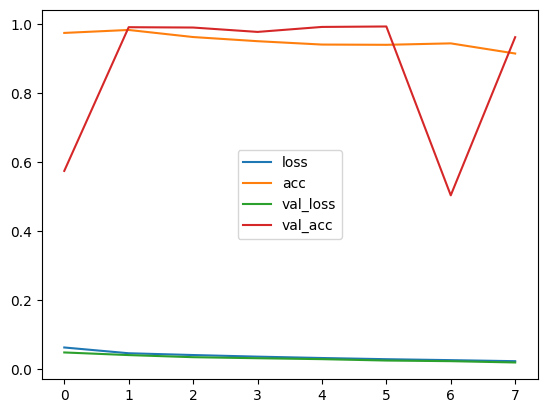

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
pd.DataFrame(history.history).plot()
plt.show()

In [35]:
model.save('toxic_predict.h5')

### predictions

In [33]:
input_text = vectorize("Are you Stupid") # Basic check.
print(input_text)

tf.Tensor([ 20   7 563 ...   0   0   0], shape=(1800,), dtype=int64)


In [34]:
# model.predict(np.array[input_text])
import tensorflow as tf

model = tf.keras.models.load_model("toxic_predict.h5")
model.predict(np.expand_dims(input_text,0))

2023-03-15 17:09:31.224227: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


array([[9.8322117e-01, 1.3020018e-02, 4.5473492e-01, 2.9097337e-04,
        8.9482903e-01, 4.8282645e-03]], dtype=float32)

### Test on TestSet

In [35]:
batch_x, batch_y = test.as_numpy_iterator().next()

2023-03-15 17:09:36.728696: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


In [36]:
(model.predict(batch_x) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Model Evaluation

In [37]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    x_true, y_true = batch
    yhat = model.predict(x_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    
    pre.update_state(y_true, yhat)
    rec.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [39]:
print(f'Precision  :{pre.result().numpy()}')
print(f'Recall  :{rec.result().numpy()}')
print(f'Accuracy  :{acc.result().numpy()}')

Precision  :0.9105458855628967
Recall  :0.8849999904632568
Accuracy  :0.4427710771560669


### USER INTERFACE

In [40]:
!pip install gradio jinja2

In [41]:
import tensorflow as tf
import gradio as gr

model = tf.keras.models.load_model("toxic_predict.h5")

In [42]:
# good text check
text_check = vectorize('I will help you without a doubt')

res = model.predict(np.expand_dims(text_check, 0))
print(res > 0.5)

train_data.columns[2:]

[[False False False False False False]]


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [43]:
#Toxic check
hate_check = vectorize('I will kill you and your family! you suck')
res = model.predict(np.expand_dims(hate_check, 0))
print(res)
print(res>0.5)
train_data.columns[2:]

[[0.9899311  0.16045134 0.9774026  0.3687496  0.9449893  0.22822717]]
[[ True False  True False  True False]]


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [44]:
train_data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [45]:
def comment_interface(comment):
    vectorize_comment = vectorize([comment])
    results = model.predict(vectorize_comment)
    
    text = ''
    for idx, col in enumerate(train_data.columns[2:]):
        text += '{}: {}\n'. format(col, results[0][idx]>0.5)
    return text

In [46]:
interface = gr.Interface(fn = comment_interface,
                        inputs = gr.inputs.Textbox(lines = 2, placeholder = 'write comment'),outputs = 'text')

interface.launch(share = True)

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://f8cfdac61a5066ca1a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
